<a href="https://colab.research.google.com/github/STKKKKK/UTS_ML_2019_ID12431868/blob/master/31005_A3_12431868.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 31005_A3:  Take Home Exam(Question 2)

**Hong Kung   (12431868)**

GitHub link: https://github.com/STKKKKK/UTS_ML_2019_ID12431868/blob/master/31005_A3_12431868.ipynb


# Introduction


The error of a machine learning model can be divided into three components, which are bias, variance and irreducible error. To find an optimal model from the model family, we always focus on reducing both variance and bias. Moreover, we want to find the model with low bias and variance - high accuracy, which has the optimum model complexity. However, it is hard to balance bias and variance; increasing model complexity will reduce bias but also increase variance that is liable to make model overfitting, while decreasing model complexity will increase bias that is prone to make model underfitting, the correlaction has shown in the following figure. The balance between bias and variance is known as trade-off management, and the ensemble method is one of the best methods to execute this trade-off (Rocca 2019).


In machine learning, the idea of using multiple learning algorithm is called ensemble method. Ensemble methods have been very successful in building advanced ensemble classifiers, and they are aimed to generate a more accurate and robust model in order to obtain better performance than an individual classifier.<br>
Nowadays, ensemble learning method is used in many field such as malware dection or face recognition. The topics include how to create diverse classifiers and how to fuse the decisions from individual classifiers, in particular how to establish the weights that individual classifiers contribute to the ensemble’s answer. This report will briefly discuss about two existing ensemble methods, include their advantages and disadvantages. Also a new method will be introduce based on learning the weights or creating diverse classifiers.

# Existing Approaches

This section is going to discuss about two existing ensemble learning methods: Bootstrap aggregating(Bagging) and Adaptative boosting(AdaBoost). Before that, base model need to be prepared. In this case, K-nearest neighbors(K-NN) and Decision tree classifiers are imported from Scikit-learn machine learning library. Then Bagging Classifier and AdaBoost Classifier can be imported from 'ensemble' from sklearn library as well. 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### Bootstrap aggregating (Bagging)

Bagging is the ensemble method that involves having each model in ensemble vote with the equal weight.In other words, bagging is a special model averaging approach. In order to reduces variance and helps to avoid overfitting, bagging method will trains each model in the ensemble using the randomly drawn subset from training data set. <br>
Bagging is widely used for desicion tree algorithm. For example, the random forest algorithm combines random decision trees with bagging in order to obtain a much higher classification accuracy. In fact, bagging can actually be used to combining any type of basic algorithm.<br>
One of the main concept of bagging is bootstrap sample: suppose a  training set D of size n,
bagging method will generates x new training sets E with size m for each. By sampling with replacement, some observations may be repeated in each E. If m =n, then for large n the set, is expected to have the fraction (1 - 1/e) (≈63.2%) of the unique examples of D, the rest being duplicates(Aslam 2007). After that, by using these x bootstrap samples, x models are fitted. And finally, they can be combined by averaging the voting (classification) or output (regression).<br>
Bagging will significantly improve the model performance of unstable procedures problems, such as classification and regression trees, artificial neural networks. Ofcourse, the performance of stable method like K-nearest neighbors(K-NN) may also improve by using bagging.

### Adaptative boosting (AdaBoost)

Boosting methods are designed to train each new model instance to emphasize the training instances that previous models wrong classified. Although, boosting methods may have higher accuracy than bagging in many cases, but it does not mean that boosting methods generally perform better because of the over-fitting to the training data set. <br>

AdaBoost is one of the most well known boosting methods. Like any other boosting methods, AdaBoost can be considered as iterate addition of weak classifiers to a strong classifier.To be specific, each weak learner produces an output hypothesis: $h(x_{i})$, and At each iteration t, a weak learner is selected and assigned a coefficient: $a_{t}$, so that the sum error can be minimized: $E_{t} = Σ_{i}E[F_{t-1}(x_{i})+a_{t}h(x_{i})]$, while $F_{t-1}(x_{i})$ is the boosted classifier from previous stage.<br>
When a individual weak classifier is added, the data weight will be re-set. During this change, the weight of each sample in the training data set will be re-set which equals to the current error $E(F_{t-1}(x_{i}))$. In this case, the well classified data will seems to lose its weight and wrong classified data will gain its weight, so that the error of previous weak classifier is focused while doing the iterate addition.<br> 



# Analyse advantages and disadvantages of two approaches¶


In this section, Iris flower classification problem is used as the example. Visualization and testing tools also need to be prepared.

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:,1:3]
y = iris.target

In [0]:
import time
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as spec
%matplotlib inline

from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions

As it mentioned above, the chosen base model is desicion tree and K-NN. The decicion tree in this section is CART which use Gini-score as the criterion.

In [0]:
c_tree = DecisionTreeClassifier(criterion='gini', max_depth=1)  

c_bag_tree = BaggingClassifier(base_estimator=c_tree, n_estimators=10, max_samples=0.8, max_features=0.8)

c_bst_tree = AdaBoostClassifier(base_estimator=c_tree, n_estimators=10)


trees = {'CART tree': c_tree,
         'Bagging CART': c_bag_tree,
         'AdaBoosting CART':  c_bst_tree}


c_knn = KNeighborsClassifier(n_neighbors=1)

c_bag_knn = BaggingClassifier(base_estimator=c_knn, n_estimators=10, max_samples=0.8, max_features=0.8)


knns = {'knn': c_knn,
        'Bagging knn': c_bag_knn}

This is the visualization function which helps to demonstrate iris classification accuracy.

In [0]:
def accuracy(classifiers):
  
  fig = plt.figure(figsize=(13, 12))
  gs = spec.GridSpec(2, 2)
  grid = itertools.product([0,1],repeat=2) 
  labels, clfs = classifiers.keys(), classifiers.values()
  
  for label, clf, gd in zip(labels ,clfs, grid):   
    
    start = time.time()
    scores = cross_val_score(clf, x, y, cv=4, scoring='accuracy')
    clf.fit(x, y)
    end = time.time()

    print ("Accuracy: %.2f Time: %.3f\t--%s"%(scores.mean(), end-start, label)) 
    ax = plt.subplot(gs[gd[0], gd[1]])
    fig = plot_decision_regions(X=x, y=y, clf=clf, legend=2)
    plt.title(label)

  plt.show()

Accuracy: 0.67 Time: 0.015	--CART tree
Accuracy: 0.76 Time: 0.074	--Bagging CART
Accuracy: 0.86 Time: 0.074	--AdaBoosting CART


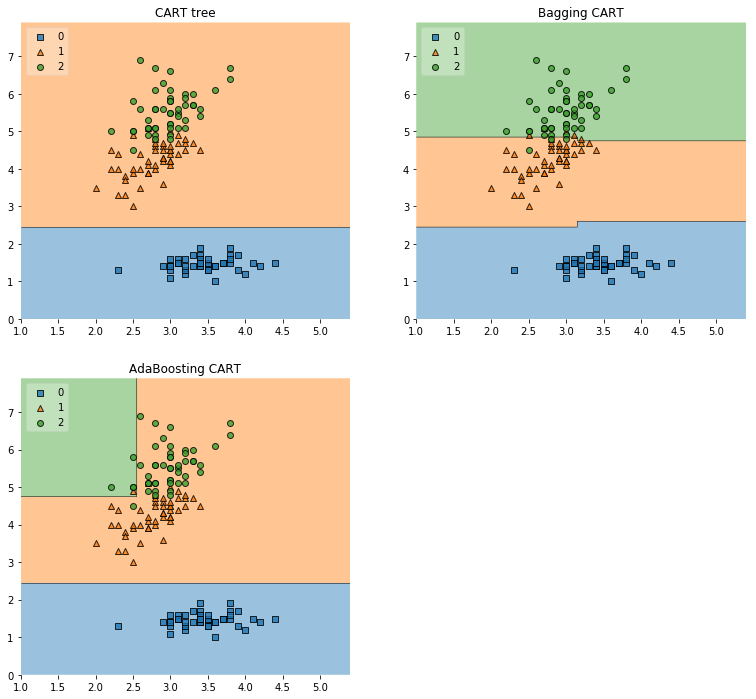

In [91]:
accuracy(trees)

According to above, both Bagging tree and AdaBoosting tree both perform better than a single CART tree model. And Adaboosting tree have higher accuracy than Bagging tree, this is maily because Adaboosting focus on the bias reduction of weak learner, therefore improve the performance of these weak learner. <br>
However, for a more complex and robust model like Adaboosting, reduction of bias will increase variance which leads to model over-fitting, which include the issues such as more sensitive to outliers, although this is not clearly shown on the above graph.<br>
On the other hand, boosting method usually does not have over-fitting issue(different from most ensemble methods) due to its variance reduction, but the bias increase at the same time which leads to lower accuracy particular in smaller training set like above shows. If the training set is small enough, the boosting will be almost unusable due to the extreme bias increasing.


Accuracy: 0.91 Time: 0.026	--knn
Accuracy: 0.83 Time: 0.084	--Bagging knn


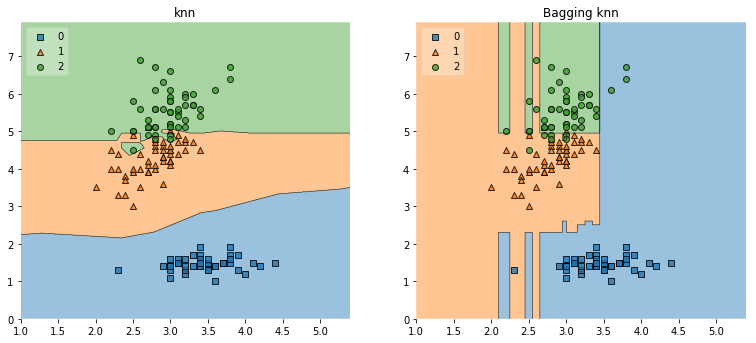

In [89]:
accuracy(knns)

According to above, It is easy to tell that Bagging is unusable with K-NN model, even the individual K-NN can perform better in this case because K-NN is stable classifier.

In addition, although the base model CART decision tree and K-NN is not complex enough to tell the time effiency difference of Bagging and AdaBoosting. The fact is that AdaBoosting will getting slow while the the complexity of its base model increses, while Bagging will not getting significantly slower. Other negative issues which cause by more complex base model such as higher computing requirement will also exist in AdaBoosting more obviously.

# Plan a new method

My new method is based on learning the weights of original Adaboosting method. Rather than using the linear calculation to get the weight, we can get the Sum error(mis-classified instances) nonlinearly and get the weighted average as each weak learner's weight in order to reduce the varince without having bias increase. As this may be an infinite iteration, the over-fitting issue may be slightly mitigate if the iterating time is long enough. The classification result of first stage may be appear like something similiar to the black line in the image below.

![new way](https://raw.githubusercontent.com/STKKKKK/UTS_ML_2019_ID12431868/master/new_method.png)

# References

1. Aslam, Javed A.; Popa, Raluca A.; and Rivest, Ronald L. (2007); On Estimating the Size and Confidence of a Statistical Audit, Proceedings of the Electronic Voting Technology Workshop (EVT '07), Boston, MA, August 6, 2007.
